# Unsupervised Learning 1: Dimensionality Reduction

Unsupervised learning algorithms differ from classification and regression methods because they work with unlabeled data, learning the underlying structure without any explicit guidance. This has two main benefits: first, it allows for the processing of large datasets without the costly and time-consuming need for manual labeling; second, it enables insights into data patterns that are not predefined by labels. However, evaluating the quality of these algorithms is challenging due to the absence of explicit performance metrics that are common in supervised learning.

A common application of unsupervised learning is **dimensionality reduction**—techniques that reduce the number of input features in a dataset. Dimensionality reduction serves several purposes:
- **Mitigating the Curse of Dimensionality**: As the number of input features increases, predictive models can struggle due to overfitting and increased computational demands.
- **Feature Extraction**: Often, some features are redundant or can be represented as combinations of others, allowing us to reduce dimensionality without significant information loss.
- **Enhanced Data Visualization**: By reducing data to 2D or 3D, dimensionality reduction makes it possible to visualize complex datasets, aiding in interpretation. For example, techniques like t-SNE are used to cluster and visualize high-dimensional data, revealing underlying patterns.

Dimensionality reduction is also valuable as a preprocessing step in supervised learning, helping to address multicollinearity and simplifying the feature space for models like decision trees.

## PCA

**Principal Component Analysis (PCA)** is a widely used method for dimensionality reduction that projects high-dimensional data onto a lower-dimensional orthogonal subspace. The goal is to retain as much of the original variance (information) as possible while reducing the number of dimensions. PCA achieves this by identifying the directions, known as **principal components**, along which the data varies the most. This process also helps eliminate highly correlated features because the principal components are orthogonal to each other.

For PCA to work effectively, centering the data is mandatory to ensure it is zero-centered, as PCA relies on the covariance structure of the data, which assumes a mean of zero. Standardization (scaling to unit variance) is optional but recommended when features have different scales, as it ensures that each feature contributes equally to the principal components.

To reduce the dimensionality from $N$ to $M$ (where $M < N$), PCA involves the following steps:

1. **Center (and optionally Standardize) the Data**:
   - Center each feature by subtracting its mean, ensuring the data is zero-centered.
   - Optionally, scale each feature to unit variance, especially if the features have different scales, to ensure equal weight in PCA.


2. **Compute the Covariance Matrix**:
   - Calculate the covariance matrix $C$ of the centered data $X$

3. **Find the Projection Axes that Maximize Variance**:
   - To find the projection axes (principal components) that maximize variance, solve the eigenvalue equation:
     $C w = \lambda w$
     
     - **Explanation**:
       - $w$ represents an eigenvector of the covariance matrix $C$, defining a direction in the feature space.
       - $\lambda$ is the corresponding eigenvalue, indicating the amount of variance along the direction of $w$.
       - Solving this equation yields the eigenvectors and eigenvalues of $C$.
       - The eigenvectors $w$ define the principal component directions onto which the data should be projected to maximize variance.
       - This equation ensures that the chosen projection axes correspond to the directions with the greatest variance in the data.

4. **Sort and Select Top $k$ Eigenvectors**:
   - Sort the eigenvalues in decreasing order.
   - Select the top $k$ eigenvectors corresponding to the largest eigenvalues to form the projection matrix $W$.
     - $W$ has dimensions $m \times k$, where $m$ is the original feature count.

5. **Project the Data**:
   - Multiply the original data $X$ by the projection matrix $W$ to obtain the transformed data:
     $X_{\text{PCA}} = X W$
     - $X_{\text{PCA}}$ has dimensions $n \times k$, where $n$ is the number of samples, and $k$ is the reduced dimension.

**Result**:

- $X_{\text{PCA}}$ is the lower-dimensional representation of $X$, capturing the directions with the most variance.
- By retaining only the top $k$ principal components, PCA reduces the dimensionality while preserving as much of the original information (variance) as possible.

**Key Concepts**:

- **Eigenvectors ($w$)**: Special vectors associated with a matrix that, when the matrix is applied to them, do not change direction—only their magnitude is scaled. In PCA, eigenvectors define the directions of the principal components.
- **Eigenvalues ($\lambda$)**: Scalars that indicate how much the eigenvector is stretched or compressed during the transformation. Larger eigenvalues correspond to directions with more significant variance.
- **Maximizing Variance**: By solving $C w = \lambda w$, we find the directions $w$ along which the variance of the data is maximized. This is crucial for reducing dimensionality while retaining as much information as possible.
- **Orthogonality**: The principal components are orthogonal (perpendicular) to each other, ensuring that the new features are uncorrelated.

By following these steps, PCA provides an efficient way to simplify complex datasets, making it easier to visualize and analyze high-dimensional data.

**Note that steps 2-5 are typically handled automatically by PCA libraries, simplifying the implementation process.**

### T-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique that transforms data so that points close to each other in the original high-dimensional space remain close in the reduced low-dimensional space. It achieves this by:

1. **Calculating Pairwise Similarities:**
   It computes the pairwise similarity between points in the original space, representing the probability that a point would choose another point as its neighbor.

2. **Initializing in Lower Dimensions:**
   Points are randomly placed in the lower-dimensional space.

3. **Iterative Optimization:**
   The algorithm iteratively adjusts the positions of the points in the low-dimensional space to minimize the difference between the pairwise similarities in the original and reduced spaces.

The primary parameter in t-SNE is **perplexity**, which reflects the expected number of close neighbors for each point. It balances attention between local and global aspects of the data and influences how the algorithm models the data's structure.

### PCA vs T-SNE

| Feature                     | PCA (Principal Component Analysis)                           | t-SNE (t-Distributed Stochastic Neighbor Embedding)                             |
|-----------------------------|-------------------------------------------------------------|----------------------------------------------------------------------------------|
| **Primary Purpose**         | Dimensionality reduction                                    | Data visualization                                                               |
| **Determinism**             | Deterministic (always produces the same result on the same data) | Stochastic (results vary across runs on the same data)                          |
| **Projection Type**         | Linear                                                      | Non-linear                                                                      |
| **Result Interpretation**   | Unique, interpretable as axis rotations                     | Non-unique, interpretation is subjective                                        |
| **Preservation of Structure** | Preserves global variance (captures overall variance)     | Preserves local structure (maintains clusters)                                  |
| **Cluster Separation**      | May lose cluster separation; not suited for non-linear clusters | Effective at visualizing clusters; does not indicate global separation       |
| **Application Suitability** | Suitable for linearly structured data                       | Suitable for data with complex, non-linear relationships                        |
| **Scalability**             | Fast, works well with large datasets                        | Computationally expensive, slower with large datasets                           |
| **Interpretation of Distances** | Distances in lower dimensions can reflect high-dimensional distances | Distances between clusters in low-dimensions may not represent true separation in high dimensions |


### Practice

In [30]:
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

Text(0.5, 0, 'petal length')

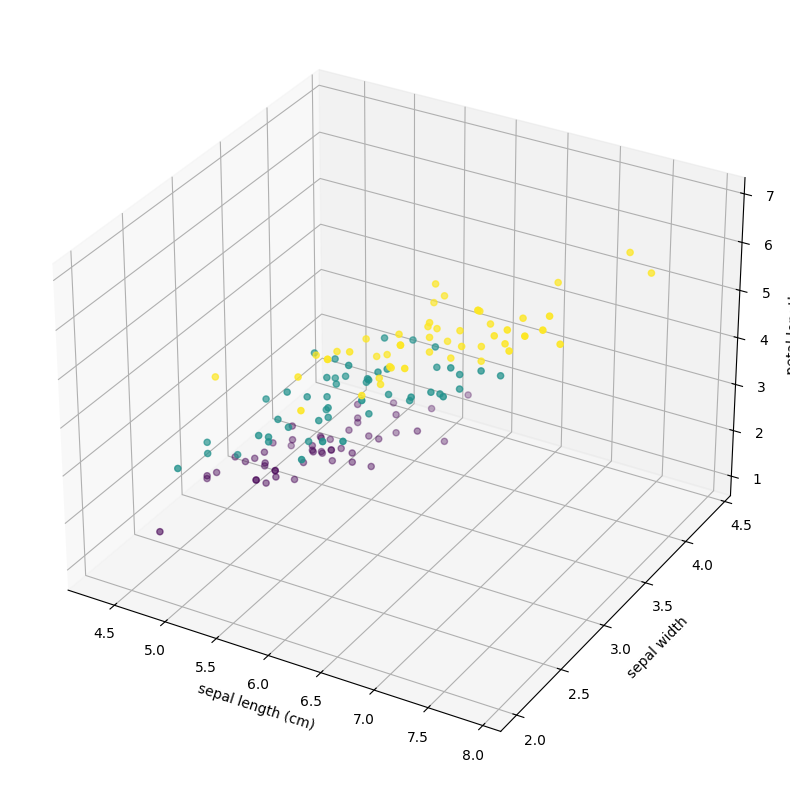

In [32]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:, 1], X[:,2], c=y, cmap='viridis')

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')

Let's reduce the dimeension of the dataset to 2 features. Remember to scale the feature before passing to PCA.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_processed = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

In [34]:
X.shape

(150, 4)

In [35]:
X_pca.shape

(150, 2)

Now we can visualize it in 2 dimensions which maximize the variance 

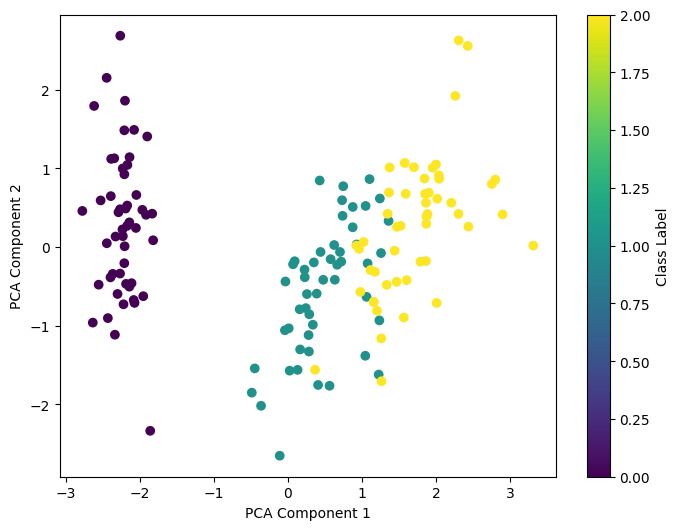

In [36]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar(scatter, label='Class Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

We can observe that points of the same class remain distinguishable in the lower-dimensional representation, with similar classes clustering together.

When working with a dataset containing multiple features, reducing dimensionality can improve model accuracy by removing redundant information and noise. In this example, we have only four original features. We can apply a simple model—a decision tree classifier with a maximum depth of two—to predict the target class in the Iris dataset. By reducing the number of features, we allow this simple model to generalize better, potentially enhancing performance and interpretability.

PCA should be fitted on the training data, after which, we apply the transformation on the validation set.

In [37]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [38]:
X_train.shape, X_val.shape, X_test.shape

((90, 4), (30, 4), (30, 4))

In [39]:
# no PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)

0.9

In [40]:
# with PCA
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)

X_val_processed = scaler.transform(X_val)
X_val_pca = pca.transform(X_val_processed)
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_val_pca)

accuracy_score(y_val, y_pred)

0.9333333333333333

We can see that the accuracy has improved

Let's load a dataset with more features: `sklearn.datasets.load_digits()`. This dataset contains images of handwritten digits (0 to 9) represented as 8x8 grayscale images, with each image consisting of 64 pixel values. We can apply PCA to reduce the dimensionality of this dataset, compressing the images while retaining as much important information as possible.

In [41]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [42]:
X.shape

(1797, 64)

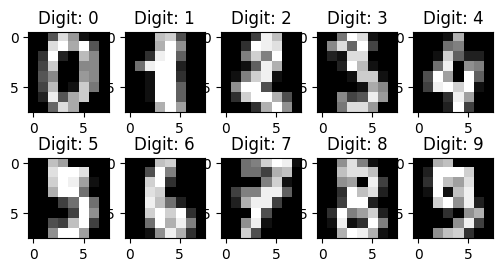

In [43]:
plt.figure(figsize=(6, 3))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i, :].reshape([8,8]), cmap='gray')
    plt.title(f'Digit: {y[i]}')



In [44]:
X.mean()

np.float64(4.884164579855314)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [46]:
X_scaled.min()

np.float64(-1.0)

In [47]:
X_scaled

array([[-1.   , -1.   , -0.375, ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ...,  0.25 , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ...,  1.   ,  0.125, -1.   ],
       ...,
       [-1.   , -1.   , -0.875, ..., -0.25 , -1.   , -1.   ],
       [-1.   , -1.   , -0.75 , ...,  0.5  , -1.   , -1.   ],
       [-1.   , -1.   ,  0.25 , ...,  0.5  , -0.875, -1.   ]])

In [48]:
pca.explained_variance_ratio_

array([0.14815157, 0.13523675])

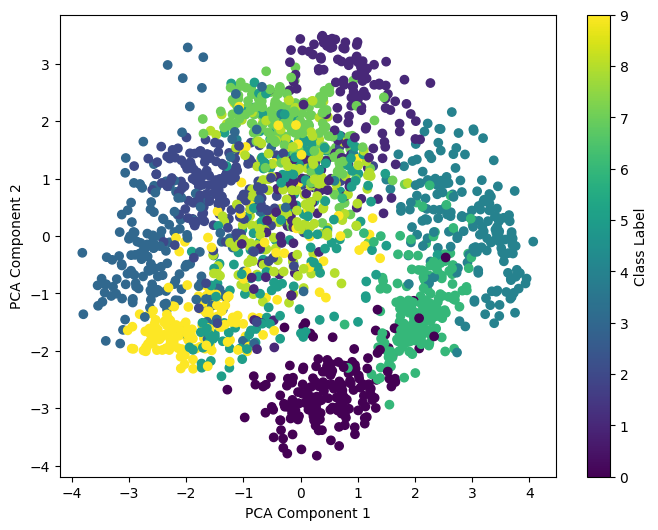

In [49]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar(scatter, label='Class Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

We can examine the proportion of variance explained by each principal component by calling `pca.explained_variance_ratio_`. Let's perform PCA again, this time retaining all components, and observe the cumulative explained variance as we add each component, from the first up to all 64. This will allow us to se how much variance is captured with each additional component. Using all components will result in a cumulative explained variance of 100%.

In [50]:
pca = PCA().fit(X_scaled)

np.cumsum(pca.explained_variance_ratio_)

array([0.14815157, 0.28338833, 0.40045486, 0.48362011, 0.54098624,
       0.58948714, 0.63201594, 0.6687911 , 0.70202486, 0.7324912 ,
       0.75608651, 0.77890937, 0.79712249, 0.81485622, 0.82944182,
       0.84340454, 0.85650474, 0.86893492, 0.87913881, 0.88823486,
       0.89714235, 0.90512219, 0.91300643, 0.92063854, 0.92754065,
       0.93349664, 0.939264  , 0.94437671, 0.94938497, 0.95380998,
       0.95778673, 0.96156423, 0.96499738, 0.96830884, 0.9714456 ,
       0.97440993, 0.97698292, 0.97932577, 0.98161132, 0.98387305,
       0.985947  , 0.98782145, 0.98941846, 0.99092372, 0.99231078,
       0.99345396, 0.99457319, 0.99555286, 0.99650144, 0.9972175 ,
       0.9977327 , 0.99817983, 0.9985299 , 0.99883352, 0.99912023,
       0.99939681, 0.99962   , 0.99974835, 0.99986196, 0.99994922,
       1.        , 1.        , 1.        , 1.        ])

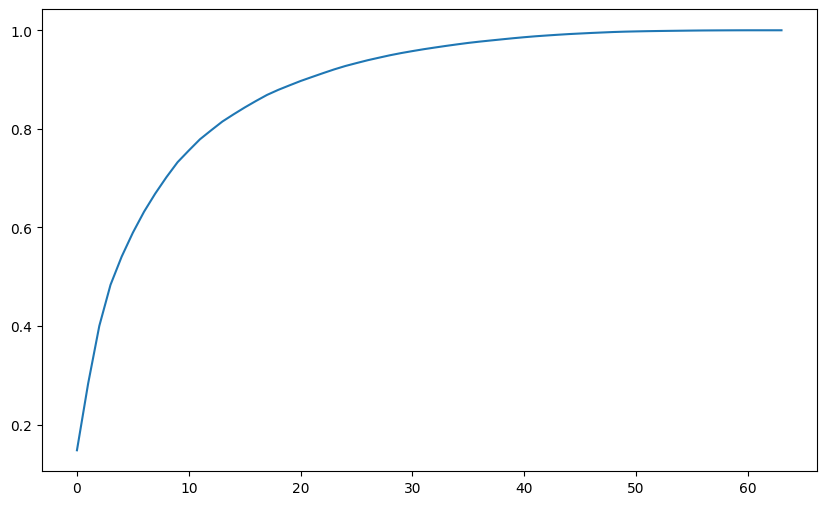

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

Often, we select the number of components to compress the image while retaining a target percentage of variance, such as 90%. In this case, retaining 90% of the variance would require approximately 20 components.

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE()
# we do not scale for TSNE, as the features are on the same scale
X_tsne = tsne.fit_transform(X)

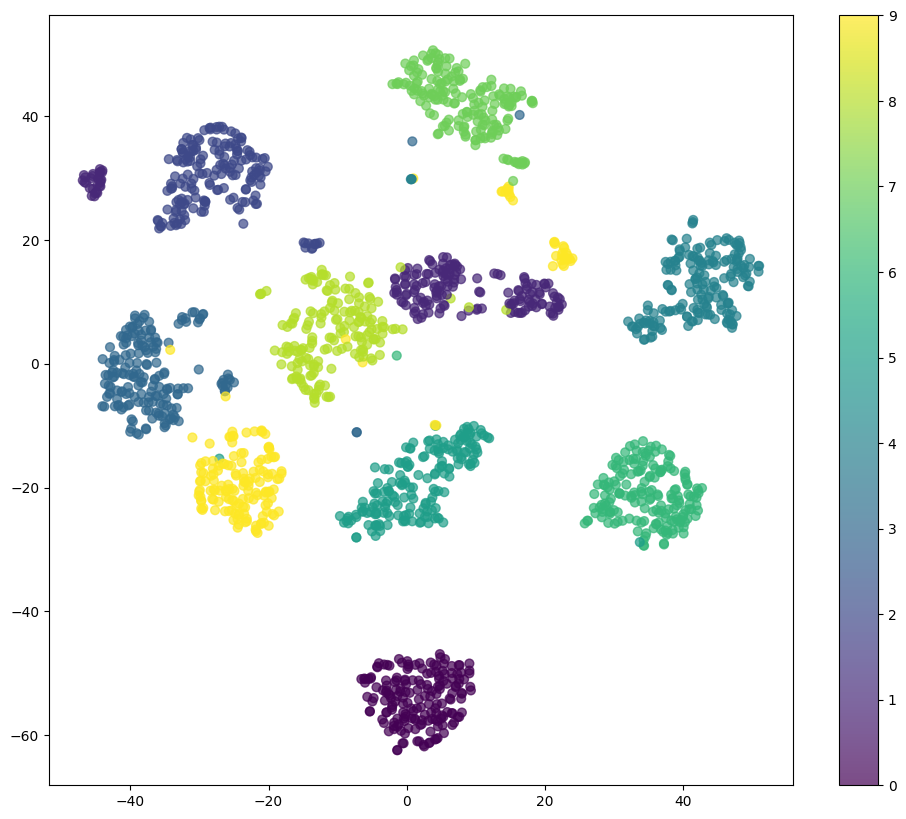

In [53]:
plt.figure(figsize=(12, 10))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=40, alpha=0.7)
plt.colorbar()

Applying t-SNE reveals that points representing the same digits are grouped more closely, while different digits are more spread out. This occurs because t-SNE focuses on preserving local similarity between points in the original and transformed spaces. Unlike PCA, t-SNE doesn’t retain the global structure of the data; instead, it prioritizes clustering similar elements together, leading to distinct, tightly-knit groups.

Let’s examine the blue points corresponding to the digit '3,' which are positioned near the cluster for the digit '7.' By selecting these points based on their coordinates, we can visualize the images to understand why they might be grouped incorrectly. t-SNE is often used in this way to inspect anomalies or misgrouped instances in the data.

In [54]:
df = pd.DataFrame(X_tsne, columns=['c1', 'c2'])

df['target'] = y

In [55]:
df[(df.c1 > 0) & (df.c2 > 30) & (df.target == 3)]

,c1,c2,target
1118,16.365877,40.206860,3
1605,0.826399,35.938763,3


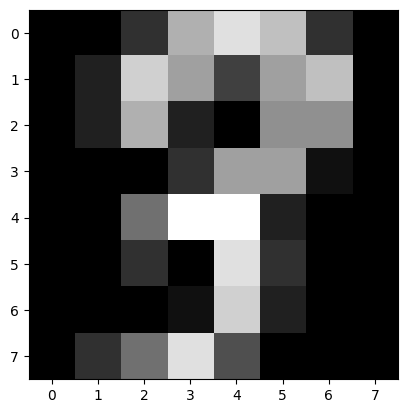

In [56]:
plt.imshow(X[1118 ].reshape([8,8]), cmap='gray')

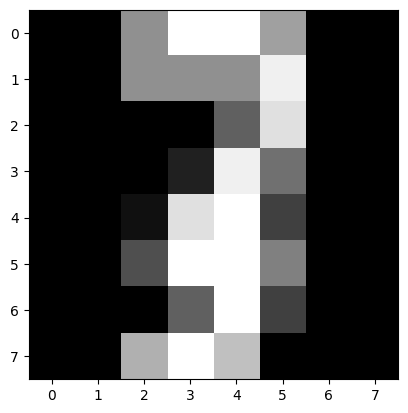

In [57]:
plt.imshow(X[1605].reshape([8,8]), cmap='gray')

We can see that these images are indeed ambiguous and could easily be mistaken for the digit '7.'